<a href="https://colab.research.google.com/github/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10/blob/main/experiments/train_vae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set Env**

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

from google.colab import userdata
token = userdata.get('GITHUB_TOKEN')
user_name = userdata.get('GITHUB_USERNAME')
mail = userdata.get('GITHUB_MAIL')

!git config --global user.name "{user_name}"
!git config --global user.email "{mail}"
!git clone https://{token}@github.com/azhgh22/Comparative-analysis-of-Generative-models-on-CIFAR-10.git

# **Import**

In [52]:
# Imports
import sys
import os
import torch
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid

# Add the root directory of the cloned repository to the Python path
sys.path.append('/content/Comparative-analysis-of-Generative-models-on-CIFAR-10')

import importlib
import data.cifar10 as cifar10_module
import utils.checkpointer as checkpointer_module
import train.train as train_module
import models.VAE_models.conv_vae as conv_vae_module
import samplers.vae_sampler as vae_sampler_module
import utils.weight_init as weight_module
import models.VAE_models.vqvae as vqvae_module
import models.VAE_models.pixelcnn as pixelcnn_module
import models.VAE_models.vaegan as vaegan_module
importlib.reload(cifar10_module)
importlib.reload(checkpointer_module)
importlib.reload(train_module)
importlib.reload(conv_vae_module)
importlib.reload(vae_sampler_module)
importlib.reload(weight_module)
importlib.reload(vqvae_module)
importlib.reload(pixelcnn_module)
importlib.reload(vaegan_module)
from data.cifar10 import load_cifar10
from utils.checkpointer import Checkpointer
from train.train import Train
from models.VAE_models.conv_vae import ConvVAE
from samplers.vae_sampler import vae_sample
from utils.weight_init import WeightsInitializer
from models.VAE_models.vqvae import VQVAE
from models.VAE_models.pixelcnn import PixelCNN
from models.VAE_models.vaegan import VAEGAN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


# **Load Cifar Data**

In [3]:
train_loader, _ = load_cifar10(batch_size=128)

100%|██████████| 170M/170M [00:03<00:00, 49.1MB/s]


In [4]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Convert to HWC for plotting
def show_img(img):
  if img.dim() == 4:
      img = img[0]
  img = img.detach().cpu()
  img = img.clamp(0,1)
  img = img.permute(1,2,0)  # CHW -> HWC
  plt.figure(figsize=(4,4))
  plt.imshow(img, interpolation='nearest')
  plt.axis('off')
  plt.show()

# **Train VaeGan**

In [53]:
%%capture
model = VAEGAN().to(device)
model.apply(WeightsInitializer())

In [1]:
checkpoint_dir = "/content/drive/MyDrive/checkpoints_final/VaeGan"
checkpointer = Checkpointer(checkpoint_dir,"VaeGan",1,False)
train = Train(model,200,train_loader,checkpointer,device)
train.load_checkpoint()
# torch.autograd.set_detect_anomaly(True)
# train.train()

NameError: name 'Checkpointer' is not defined

In [39]:
train.epoch_losses

[{'kld': 0.5723057102097575,
  'recon': 1.7981258749752247,
  'd_loss': 0.9487318049001572,
  'g_loss': 0.14904111906495468},
 {'kld': 0.08465995211773517,
  'recon': 1.1049852791954489,
  'd_loss': 0.2688735661375553,
  'g_loss': 0.01091880462658794},
 {'kld': 0.05821720949467033,
  'recon': 0.7906687561508334,
  'd_loss': 0.10826711085103356,
  'g_loss': 0.009193488517138974},
 {'kld': 0.04512036665130759,
  'recon': 0.7063435468527363,
  'd_loss': 0.04620403953401558,
  'g_loss': 0.005653890368738272},
 {'kld': 0.03680154006890095,
  'recon': 0.7497064003249263,
  'd_loss': 0.03081676025000756,
  'g_loss': 0.0026438151561545536},
 {'kld': 0.030162755745317776,
  'recon': 0.5884264335607934,
  'd_loss': 0.021246496821417833,
  'g_loss': 0.00069703226844583},
 {'kld': 0.024825148829890183,
  'recon': 0.48482706944655884,
  'd_loss': 0.020275824902164737,
  'g_loss': 2.550892859477428e-05},
 {'kld': 0.02103005889612619,
  'recon': 0.4601004513938104,
  'd_loss': 0.008268339569856653,
 

In [44]:
images = vae_sample(model.decoder,10)

In [ ]:
images.shape

torch.Size([10, 3, 32, 32])

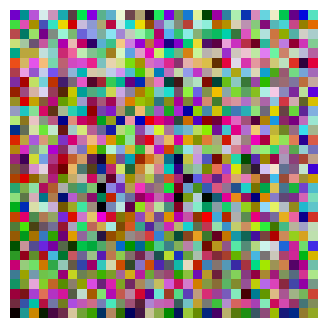

In [45]:
show_img(images[0])

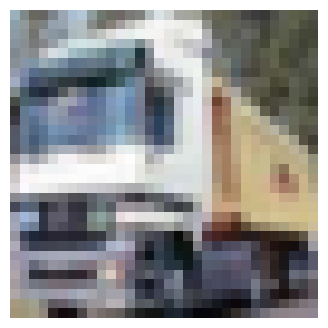

In [46]:
train_dataset = train_loader.dataset
img = train_dataset[1][0]
show_img(img)

In [47]:
# print(img.unsqueeze(0) .shape)
model.eval()
with torch.no_grad():
  recon = model(img.unsqueeze(0).to(device))

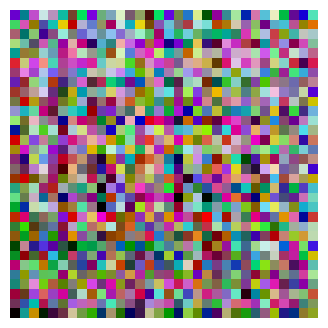

In [48]:
# recon.shape
show_img(recon[0])
# indices.shape

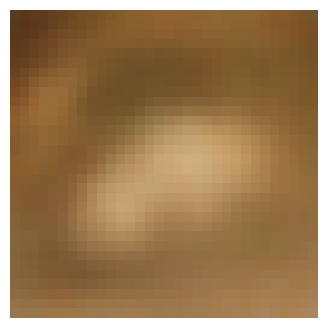

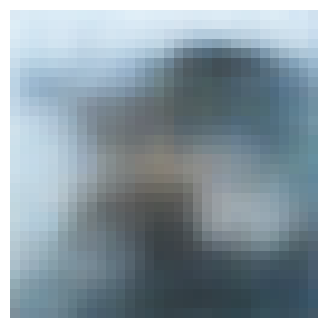

In [ ]:
decoder = model.decoder

x = model.forward(img.unsqueeze(0).to(device))
show_img(x[0])

sample = vae_sample(decoder,1)
show_img(sample[0])